# UNAD
## Breyner Alexander Parra
## Daniel Felipe Gonzalez Sanchez
## Clasificación del árbol de decisión Titanic

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report

In [19]:
# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Cargar los datos
df = pd.read_csv('./Titanic.csv')


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Descripción inicial del conjunto de datos
print(df.describe())
print(df.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

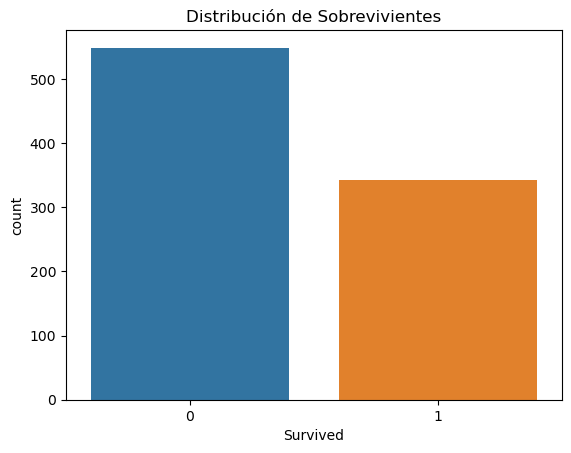

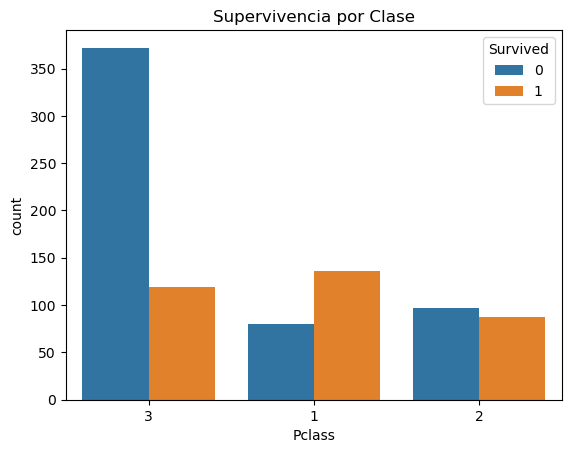

In [25]:
# Exploración de datos
if 'Survived' in df.columns:
    sns.countplot(x='Survived', data=df)
    plt.title('Distribución de Sobrevivientes')
    plt.show()
else:
    print("'Survived' column is missing from the DataFrame")

if 'Pclass' in df.columns and 'Survived' in df.columns:
    if df['Pclass'].dtype == np.int64 and df['Survived'].dtype == np.int64:
        df['Pclass'] = df['Pclass'].astype(str)
        df['Survived'] = df['Survived'].astype(str)
    sns.countplot(x='Pclass', hue='Survived', data=df)
    plt.title('Supervivencia por Clase')
    plt.show()
else:
    print("'Pclass' or 'Survived' column is missing from the DataFrame")



In [26]:
# Limpieza de datos
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [27]:
# Verificar valores nulos
print(f'Number of null values: {df.isnull().sum()}')
print(f'Number of duplicated values: {df.duplicated().sum()}')

Number of null values: Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64
Number of duplicated values: 114


In [28]:
# Imputación de valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(inplace=True)

In [29]:
# Convertir la columna 'Sex'
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [30]:
# Separar variables independientes y dependientes
X = df.drop('Survived', axis=1)
y = df['Survived']


In [31]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)


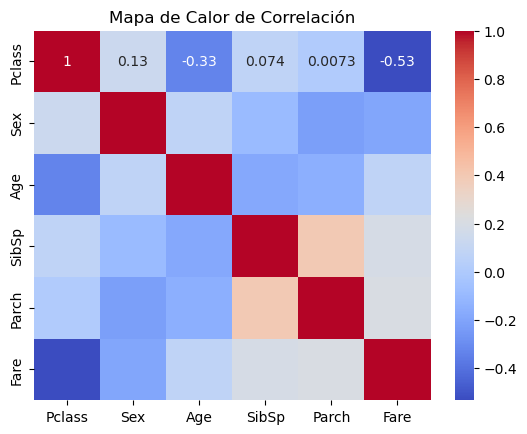

In [32]:
# Exploración de correlación
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [33]:
# Inicializar y entrenar el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Calcular la precisión del entrenamiento y prueba
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Precisión del entrenamiento: ", train_accuracy)
print("Precisión del test: ", test_accuracy)


Precisión del entrenamiento:  0.9871589085072231
Precisión del test:  0.7611940298507462


In [35]:
# Ajuste de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 50, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 50, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [36]:
# Mejor conjunto de hiperparámetros
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [37]:
# Inicializar y entrenar el modelo con los mejores hiperparámetros
model = DecisionTreeClassifier(**best_params)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [38]:
# Calcular y mostrar las precisiones de entrenamiento y prueba
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Precisión del entrenamiento con hiperparámetros ajustados:", train_accuracy)
print("Precisión del test con hiperparámetros ajustados:", test_accuracy)

Precisión del entrenamiento con hiperparámetros ajustados: 0.9229534510433387
Precisión del test con hiperparámetros ajustados: 0.7910447761194029


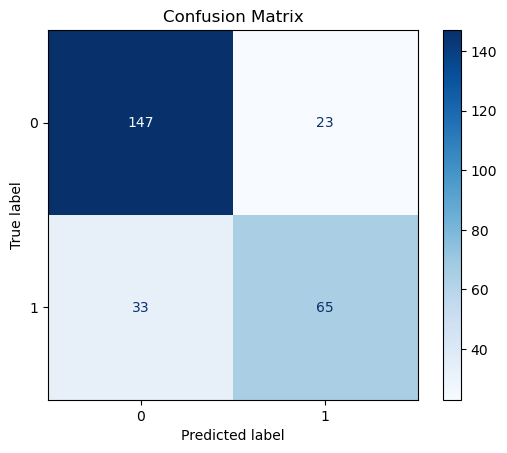

In [39]:
# Predicciones y evaluación del modelo
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Métricas adicionales
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", report)

ROC-AUC Score: 0.7639855942376951
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       170
           1       0.74      0.66      0.70        98

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



In [41]:
# Guardar el modelo
import joblib
joblib.dump(model, 'decision_tree_titanic_model.pkl')

['decision_tree_titanic_model.pkl']